In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import h5py
url = '/content/gdrive/My Drive/ml project/Untitled folder/dataml.h5'
a = h5py.File(url,'r')
x_train = a['x_train']
y_train = a['Y_train']
x_test = a['x_test']
y_test = a['y_test']

In [0]:
import numpy as np
x_train=np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = x_train.reshape(-1,8,8,8,1)
x_test = x_test.reshape(-1,8,8,8,1)


In [5]:
import keras
from keras.models import Sequential 
from keras.layers import Dense , Activation , Dropout , Flatten , Conv3D , MaxPooling3D
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv3D(16,(1,1,1) , activation = 'relu' , padding = 'same' , input_shape = (8,8,8,1)))
model.add(Conv3D(32,(1,1,1) , activation = 'relu',  padding = 'same'))   
model.add(Conv3D(32,(1,1,1) , activation = 'relu',  padding = 'same'))
model.add(MaxPooling3D((2,2,2) ,  padding = 'same'))
model.add(Conv3D(32,(1,1,1) , activation = 'relu',  padding = 'same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120,activation = 'relu'))

model.add(Dense(60,activation = 'relu')) 
   
model.add(Dense(1,activation = 'linear'))

Using TensorFlow backend.
W0623 08:36:49.936804 140672868419456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 08:36:49.965179 140672868419456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 08:36:49.975168 140672868419456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 08:36:50.030409 140672868419456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

In [6]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error' , metrics = ['accuracy' ])


W0623 08:37:15.961640 140672868419456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 8, 8, 8, 16)       32        
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 8, 8, 8, 32)       544       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 8, 8, 8, 32)       1056      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 4, 4, 4, 32)       0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 4, 4, 4, 32)       1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 4, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [9]:
history =model.fit(x_train , y_train, epochs = 20 , batch_size = 5000, validation_data=(x_test,y_test))

Train on 603267 samples, validate on 201090 samples
Epoch 1/20
603267/603267 [==============================] - 16s 27us/step - loss: 4.4607 - acc: 0.7158 - val_loss: 1.0058 - val_acc: 0.8184
Epoch 2/20
603267/603267 [==============================] - 16s 27us/step - loss: 1.5826 - acc: 0.8012 - val_loss: 0.5391 - val_acc: 0.8720
Epoch 3/20
603267/603267 [==============================] - 16s 27us/step - loss: 0.6923 - acc: 0.8623 - val_loss: 0.4097 - val_acc: 0.9049
Epoch 4/20
603267/603267 [==============================] - 16s 27us/step - loss: 0.4366 - acc: 0.8992 - val_loss: 0.3825 - val_acc: 0.9201
Epoch 5/20
603267/603267 [==============================] - 16s 27us/step - loss: 0.3757 - acc: 0.9169 - val_loss: 0.3777 - val_acc: 0.9250
Epoch 6/20
603267/603267 [==============================] - 16s 27us/step - loss: 0.3633 - acc: 0.9223 - val_loss: 0.3769 - val_acc: 0.9258
Epoch 7/20
603267/603267 [==============================] - 16s 27us/step - loss: 0.3600 - acc: 0.9240 - val

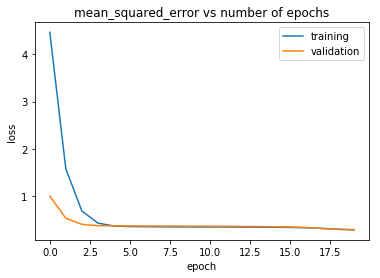

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
xlabel = 'epoch'
ylabel = 'loss'
plt_title = 'mean_squared_error vs number of epochs'
ax = fig.add_subplot(111,xlabel = xlabel , ylabel = ylabel , title = plt_title)
ax.plot(history.history['loss'], label = 'training')
ax.plot(history.history['val_loss'], label = 'validation')
plt.legend()

plt.show()

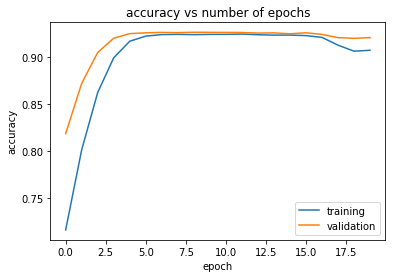

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
xlabel = 'epoch'
ylabel = 'accuracy'
plt_title = 'accuracy vs number of epochs'
ax = fig.add_subplot(111,xlabel = xlabel , ylabel = ylabel , title = plt_title)
ax.plot(history.history['acc'], label = 'training')
ax.plot(history.history['val_acc'], label = 'validation')
plt.legend()

plt.show()